# Paper-Revising 
# single-speaker model visualization
#### 1. This notebook is to visualize 3 new single-speaker datasets
#### 2. each new dataset has 5 LSTM models from 2 layers to 6 layers
#### 3. select one test audio file for each dataset, then get the inpainting results of differents layers
#### 4. see which layer has the best result inpainting results (by using the MOS values of NB and WB)

### !!!Attention: this file is using a new LJSpeech test audio for visualization, not the old one

## NOTEBOOK ATTENTION!
### 1. The csv file of the test audio file must be no (0, 1) when generating from the preprocessing.ipynb on 6.3 part.
### 2. ALL THE .csv file when put into the model, remember use no normalization (normalise=False)


In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from core.data_processor import DataLoader
from core.model import Model
from keras.utils.vis_utils import plot_model

In [2]:

# 绘图展示结果
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.savefig('results_2.png')


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')
    
def plot_results_multiple_onlypre(predicted_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    #ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')

# Place to change the LSTM layer number

In [3]:

#读取所需参数
configs = json.load(open('640-80-5-layers.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

# Place to Change the model

In [4]:

#创建RNN模型
model = Model()
mymodel = model.build_model(configs)

model_path = '/home/shh/Desktop/LSTM_Final/saved_models/(640_80_50epo_6layers)07022023-131918-e50.h5'
model.load_model(filepath = model_path)
#plot_model(mymodel, to_file='model.png',show_shapes=True)

[Model] Model Compiled
Time taken: 0:00:00.373497
[Model] Loading model from file /home/shh/Desktop/LSTM_Final/saved_models/(640_80_50epo_6layers)07022023-131918-e50.h5


In [5]:

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

In [6]:
data

In [7]:
x_test[5621]

array([[ 0.15133667],
       [ 0.16143799],
       [ 0.15927124],
       [ 0.12347412],
       [ 0.07794189],
       [ 0.02514648],
       [-0.00775146],
       [-0.01083374],
       [-0.02380371],
       [-0.05041504],
       [-0.10055542],
       [-0.15020752],
       [-0.18026733],
       [-0.16326904],
       [-0.15127563],
       [-0.16018677],
       [-0.17532349],
       [-0.20028687],
       [-0.19522095],
       [-0.17233276],
       [-0.14782715],
       [-0.15716553],
       [-0.16433716],
       [-0.10583496],
       [ 0.04718018],
       [ 0.06481934],
       [-0.02871704],
       [-0.07702637],
       [ 0.09222412],
       [ 0.23751831],
       [ 0.31832886],
       [ 0.34024048],
       [ 0.24990845],
       [ 0.16375732],
       [ 0.2315979 ],
       [ 0.4203186 ],
       [ 0.46511841],
       [ 0.37213135],
       [ 0.23217773],
       [ 0.16934204],
       [ 0.19796753],
       [ 0.2456665 ],
       [ 0.2253418 ],
       [ 0.1293335 ],
       [ 0.06030273],
       [-0

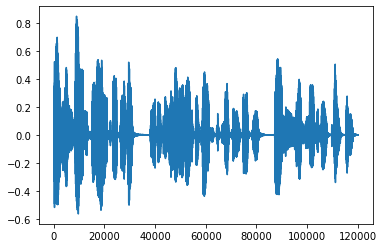

In [8]:
plt.plot(y_test)# without normal

# Predict

In [9]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


## (1) 2 layers LSTM

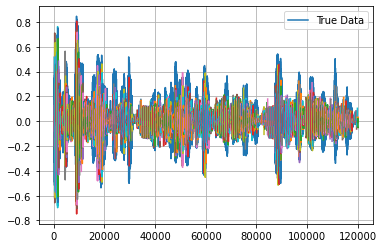

In [11]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [12]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [13]:
flat_predictions_multiseq = flatten(predictions_multiseq)

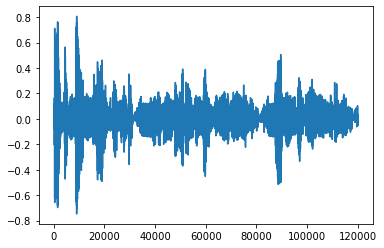

In [14]:
plt.plot(flat_predictions_multiseq)

In [15]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

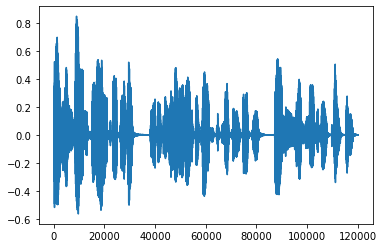

In [16]:
plt.plot(y_test_flatten)

In [17]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [18]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [19]:
import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_2layers_predicted.wav", flat_predictions_multiseq, sr)

## (2) 3 layers LSTM

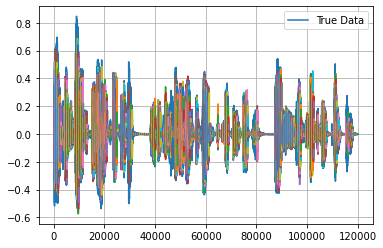

In [11]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [12]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [13]:
flat_predictions_multiseq = flatten(predictions_multiseq)

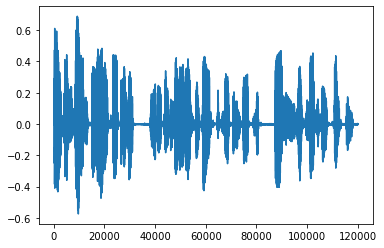

In [14]:
plt.plot(flat_predictions_multiseq)

In [15]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

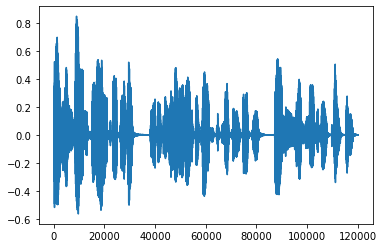

In [16]:
plt.plot(y_test_flatten)

In [17]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [18]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [19]:
import soundfile as sf
sr = 16000
# sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_3layers_predicted.wav", flat_predictions_multiseq, sr)

## (3) 4 layers LSTM

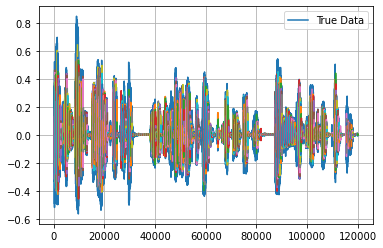

In [10]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [11]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [12]:
flat_predictions_multiseq = flatten(predictions_multiseq)

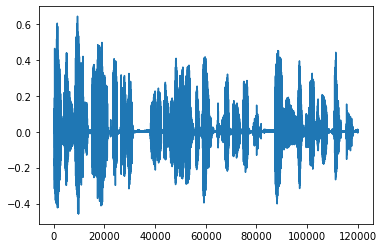

In [13]:
plt.plot(flat_predictions_multiseq)

In [14]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

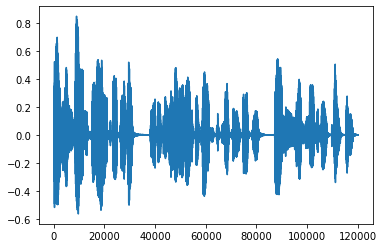

In [15]:
plt.plot(y_test_flatten)

In [16]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [17]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [18]:
import soundfile as sf
sr = 16000
# sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_4layers_predicted.wav", flat_predictions_multiseq, sr)

## (4) 5 layers LSTM

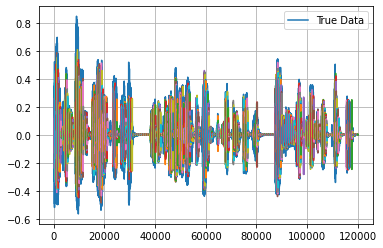

In [10]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [11]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [12]:
flat_predictions_multiseq = flatten(predictions_multiseq)

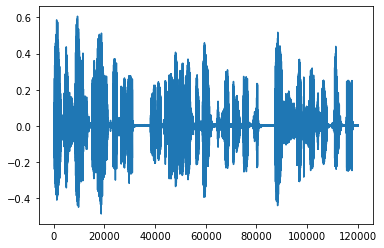

In [13]:
plt.plot(flat_predictions_multiseq)

In [14]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

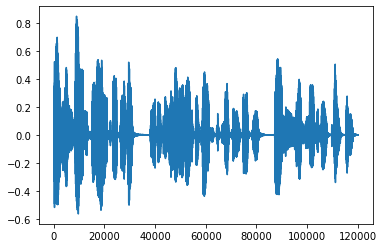

In [15]:
plt.plot(y_test_flatten)

In [16]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [17]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [18]:
import soundfile as sf
sr = 16000
# sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_5layers_predicted.wav", flat_predictions_multiseq, sr)

## (5) 6 layers LSTM

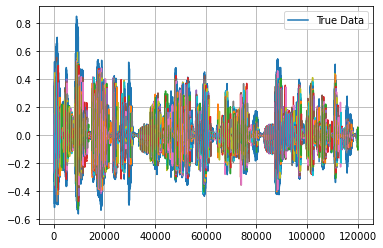

In [10]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [11]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

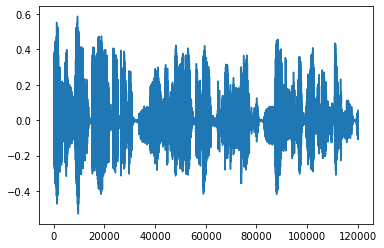

In [12]:
flat_predictions_multiseq = flatten(predictions_multiseq)
plt.plot(flat_predictions_multiseq)

In [13]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

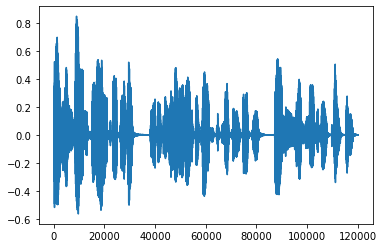

In [14]:
plt.plot(y_test_flatten)

In [15]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [16]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [17]:
import soundfile as sf
sr = 16000
# sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/LJSpeech/SingleSpeaker_LJSpeech_6layers_predicted.wav", flat_predictions_multiseq, sr)